# Draw random samples from $\mathcal{N}(0,1)$ by the inverse transform from $\mathcal{U}(0,1)$

## CDF of $\mathcal{N}(0, 1)$

* Suppose we compute the CDF of $\mathcal{N}(0, 1)$ in $[-5, 5]$.  Let `x` be the array of sampling points.
* Compute the value of $\mathcal{N}(0, 1)$ at `x` as an array `pdf`.
* Compute the CDF of $\mathcal{N}(0, 1)$ at `x` as an array `cdf`.

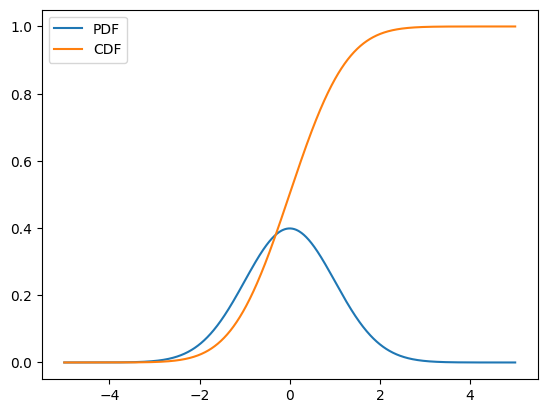

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def normal(x):
    # Standard normal distribution, mu = 0 and sd = 1
    normal_array = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
    return normal_array

def pdf2cdf(pdf):
    # Cumulative sum
    cumulative_sum = []
    temporary_sum = 0
    for value in pdf:
        temporary_sum += value
        cumulative_sum.append(temporary_sum)
    cdf = cumulative_sum
    cdf = cdf / cdf[-1] # Normalize
    return cdf 

## Do not edit hereafter ##

x = np.linspace(-5, 5, 1000)
pdf = normal(x)
cdf = pdf2cdf(pdf)

plt.plot(x, pdf, label='PDF')
plt.plot(x, cdf, label='CDF')
plt.legend()
plt.show()


## Generate random samples using $\mathcal{U}(0,1)$

* The inverse of CDF can be implemented by finding the nearest value and its index in `cdf`.
  * In this assignment, *nearest* is not necessarily strict for simplicity; meaning that it can be either the most nearest or the 2nd nearest.
  * Once the index of the nearest value in `cdf` is found, then the value of `x` at the same index is the corresponding random value in $\mathcal{N}(0, 1)$.

mu=0.0013156156156156032, var=0.995924768227196


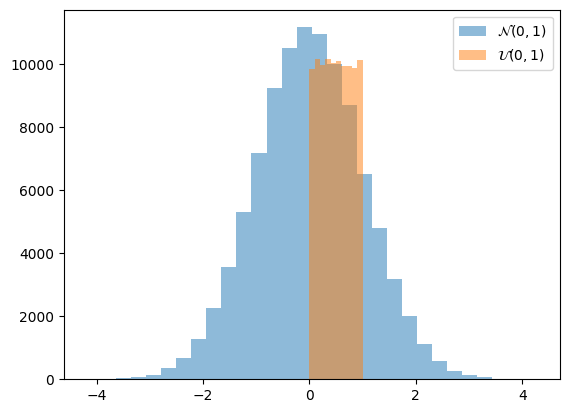

In [42]:
# random samples from U(0,1)
y = np.random.uniform(0, 1, 100000)


# implement here
# convert y to z using cdf.  z is the corresponding random value from N(0, 1).

def find_index(cdf, value):
    for i in range(len(cdf)):
        if cdf[i] >= value: # index found
            return i 
    return len(cdf) - 1 # else last index

def generate_random_samples(y, cdf, x):
    z = np.zeros_like(y) # initialize
    
    for i, value in enumerate(y): # index and value of value of U(0,1)
        index = find_index(cdf, value) #find the position/index
        
        if index >= 0:
            z[i] = x[index]
        else:
            z[i] = 0
    
    return z
        
x = np.linspace(-5, 5, 1000)
pdf = normal(x)
cdf = pdf2cdf(pdf)
z = generate_random_samples(y, cdf, x)


## Do not edit hereafter ##

# sample mean and var
mu = np.mean(z)
var = np.var(z)
print(f'mu={mu}, var={var}')

plt.hist(z, bins=30, alpha=0.5, label=r'$\mathcal{N}(0,1)$')
plt.hist(y, bins=10, alpha=0.5, label=r'$\mathcal{U}(0,1)$')
plt.legend()
plt.show()


Submission by: Orcun Ilker Doeger